# Assignment 7 - kNN, Decision Tree, RandomForest

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [3]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [4]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [5]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [6]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [8]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [9]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


# Your turn

For this assinment, we will use two features: **mean radius** and **mean texture**.

## 0. Prepare your dataset
- You should end up with the following variables: X_train, X_val, X_test, y_train, y_val, y_test
- Don't forget to scale your features
- Use only the features mentioned above.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sel=features[['mean radius', 'mean texture']]
X_train_val, X_test, y_train_val, y_test = train_test_split(sel, target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## 1. a) Train a k-NN with k=5 and plot the decision areas based on that model.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())



KNeighborsClassifier(metric='euclidean')

You can use this function to plot the decision area

In [12]:
# We define a function for plotting the 2D decision areas of a classifier

def plot_decision_areas(X_toplot, y_toplot, classifier, scaler):
    
    from matplotlib.colors import ListedColormap
    fig = plt.figure(figsize=(10, 6))

    # Preparation of the data set that will be displayed (without scaling)
    X_set, y_set = scaler.inverse_transform(X_toplot), y_toplot

    # Creation of a data grid (for the decision area)
    X_step = 0.05  # Grid step on X-axis
    Y_step = 0.05  # Grid step on Y-axis
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
        np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

    # Plotting the decision boundary
    plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

    # Plotting the data set
    for y_set_index, y_set_value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ListedColormap(('red', 'green'))(y_set_index), label = y_set_value)

    # Configuration of the figure
    plt.xlim(X_set[:,0].min(), X_set[:,0].max())
    plt.ylim(X_set[:,1].min(), X_set[:,1].max())
    plt.legend(title='Tumor type')
    plt.title(str(classifier))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')

    plt.show()

C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


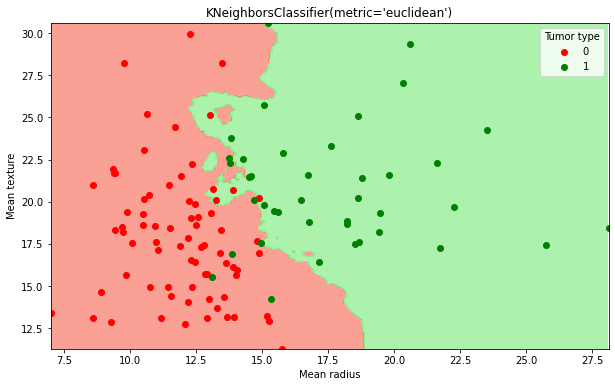

In [13]:
plot_decision_areas(X_val, y_val.values.ravel(), knn, scaler)

## b) Explore different values of k to determine an optimal value.
Make a graph to show your results and decide what value of k is optimal.

In [22]:
k_values = [3, 5, 7, 9, 11, 13]

train_scores = []
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train.values.ravel())
    
    train_score = knn.score(X_train, y_train)
    val_score = knn.score(X_val, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    
print(train_scores)
print(val_scores)

[0.9296187683284457, 0.9090909090909091, 0.9237536656891495, 0.9149560117302052, 0.9120234604105572, 0.9149560117302052]
[0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088]


C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


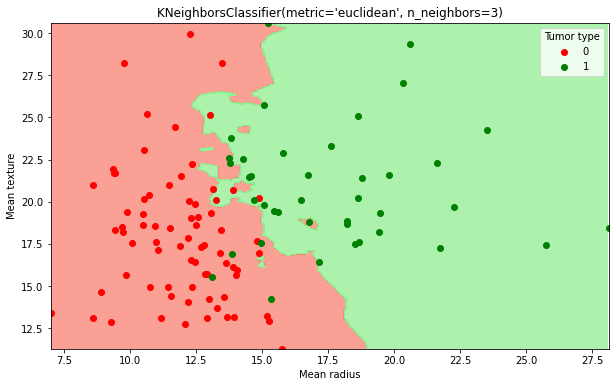

In [23]:
knn= KNeighborsClassifier(n_neighbors= 3, metric = 'euclidean')
knn.fit(X_train, y_train.values.ravel())
plot_decision_areas(X_val, y_val.values.ravel(), knn, scaler)

What value of k do you choose and why?

k=3 because it has high validation and training accuracy 

## 2.a) Train a Decision Tree and plot the decision areas based on that model.


In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


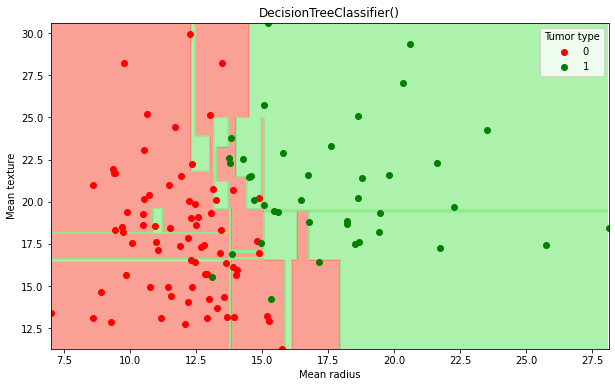

In [26]:
plot_decision_areas(X_val, y_val.values.ravel(),decision_tree , scaler)

## b) What would be an optimal value for the depth of the Decision Tree?  
Try out many values and show your results in a graph.  
Hint: you can use parameter max_depth of DecisionTreeClassifier.


In [30]:

max_depth_values = [1, 3, 5, 7, 9, 11, 13]

# Create empty lists to store accuracy scores for different max_depth values
train_scores = []
val_scores = []

# Train and evaluate decision tree classifiers for each max_depth value
for depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train.values.ravel())
    
    train_score = decision_tree.score(X_train, y_train)
    val_score = decision_tree.score(X_val, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
print(train_scores)
print(val_scores)



[0.8973607038123167, 0.9237536656891495, 0.9530791788856305, 0.9824046920821115, 0.9970674486803519, 1.0, 1.0]
[0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.868421052631579, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017]


What depth do you choose and why?

depth 5 because it has high validation and training accuracy 

## 3. Train a Random Forest and plot the decision areas based on that model.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


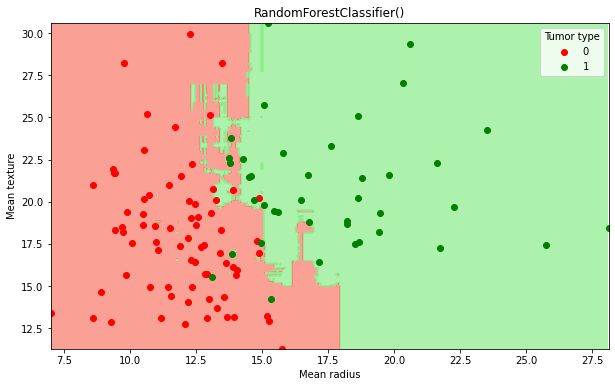

In [32]:
plot_decision_areas(X_val, y_val.values.ravel(), random_forest, scaler)

## 4. Train a Logistic Regression and plot the decision areas based on that model.


In [33]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train.values.ravel())


LogisticRegression()

C:\Users\jayes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


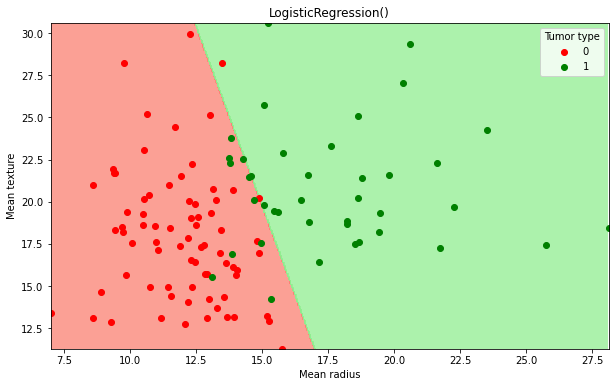

In [34]:
plot_decision_areas(X_val, y_val.values.ravel(), logistic_regression, scaler)

## 5 . Compare the performance between all that models.
For each model, compute:
- Accuracy
- Precision
- Recall
- AUC  
Your results should be displayed in a DataFrame, with the column names specifying the model used, and the row indexes specifying the metric. (The same as you did in the regression homework).  
It is worth spending some time coding a nice scoring function for a list of models, as it will be very useful on the exam :D

In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

models = [
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Logistic Regression", logistic_regression),
    ("KNN", knn)
]
metrics = ["Accuracy", "Precision", "Recall", "AUC"]
data = {metric: [] for metric in metrics}
for model_name, model in models:
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    data["Accuracy"].append(accuracy)
    data["Precision"].append(precision)
    data["Recall"].append(recall)
    data["AUC"].append(auc)
results_df = pd.DataFrame(data, index=[model_name for model_name, _ in models])
print(results_df)


                     Accuracy  Precision    Recall       AUC
Decision Tree        0.842105   0.800000  0.761905  0.825397
Random Forest        0.868421   0.864865  0.761905  0.846230
Logistic Regression  0.850877   0.878788  0.690476  0.817460
KNN                  0.833333   0.848485  0.666667  0.798611


### Optional: display the ROC curves of your models (on the same graph)

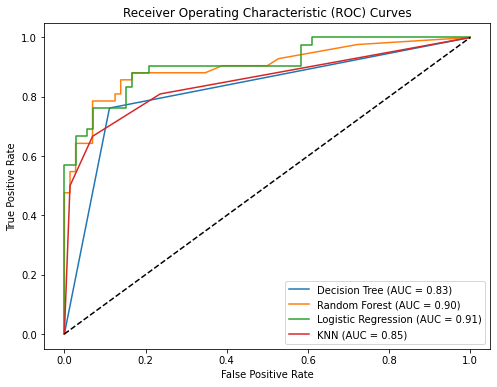

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models:
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


## 6. Pick the best model and compute its generalization performance on the test set. 

Explain what model you choose, based on what metric, and explain your choice.

Random forest because it has highest accuracy amoung the models

Score the model (all metrics) on the test set

In [43]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8684
Precision: 0.8649
Recall: 0.7619
AUC: 0.8462
